In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/adult.csv")
print("Dataset dimensions:", data.shape)

Dataset dimensions: (19240, 15)


In [ ]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0.0,30.0,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0.0,30.0,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0.0,40.0,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0.0,32.0,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0.0,40.0,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0.0,10.0,United-States,<=50K


In [ ]:

print("Dataset Features:\n")
for i, col in enumerate(data.columns, 1):
    print(f"{i}. {col}")

print("\n\nTarget Variable: income")

Dataset Features:

1. age
2. workclass
3. fnlwgt
4. education
5. educational-num
6. marital-status
7. occupation
8. relationship
9. race
10. gender
11. capital-gain
12. capital-loss
13. hours-per-week
14. native-country
15. income


Target Variable: income


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,19240.0,38.772297,13.805254,17.0,28.0,37.0,48.00,90.0
fnlwgt,19240.0,189603.152963,105776.866677,13492.0,116992.5,177900.5,238646.75,1490400.0
educational-num,19240.0,10.074688,2.565810,1.0,9.0,10.0,12.00,16.0
capital-gain,19240.0,1072.134096,7501.229092,0.0,0.0,0.0,0.00,99999.0
capital-loss,19239.0,89.110921,405.152457,0.0,0.0,0.0,0.00,3770.0
hours-per-week,19239.0,40.406882,12.418280,1.0,40.0,40.0,45.00,99.0


In [ ]:
data.info()

print("\nMissing Values Analysis:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19240 entries, 0 to 19239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              19240 non-null  int64  
 1   workclass        19240 non-null  object 
 2   fnlwgt           19240 non-null  int64  
 3   education        19240 non-null  object 
 4   educational-num  19240 non-null  int64  
 5   marital-status   19240 non-null  object 
 6   occupation       19240 non-null  object 
 7   relationship     19240 non-null  object 
 8   race             19240 non-null  object 
 9   gender           19240 non-null  object 
 10  capital-gain     19240 non-null  int64  
 11  capital-loss     19239 non-null  float64
 12  hours-per-week   19239 non-null  float64
 13  native-country   19239 non-null  object 
 14  income           19239 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.2+ MB

Missing Values Analysis:
age                0


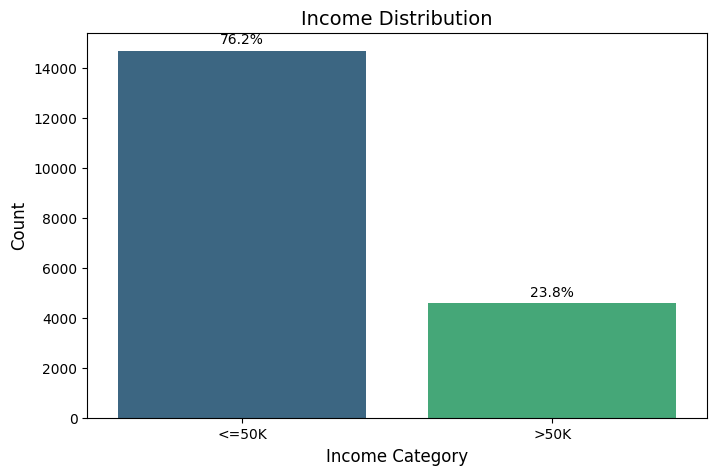

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='income', data=data, palette='viridis')

total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 300
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Income Distribution', fontsize=14)
plt.xlabel('Income Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

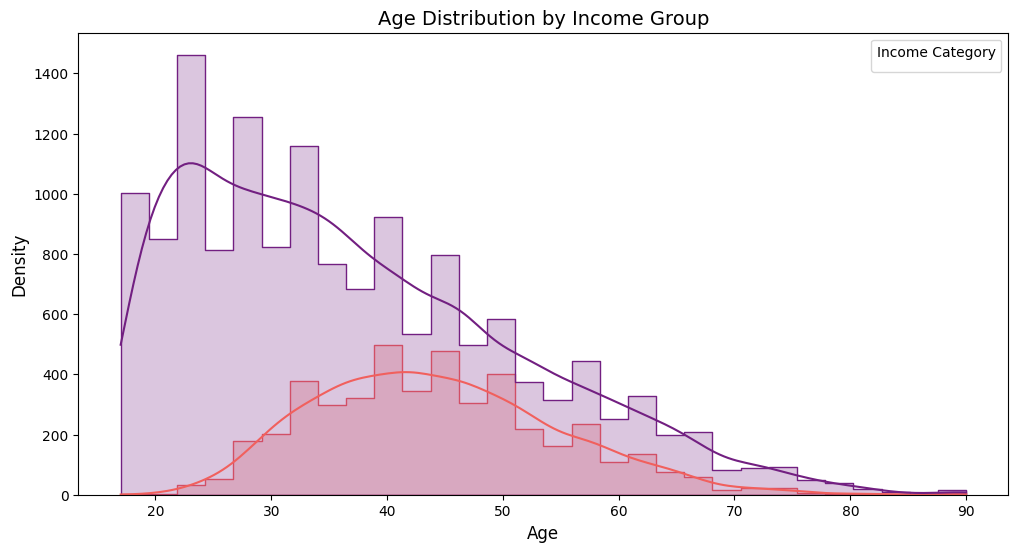

In [ ]:

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='age', hue='income',
             element='step', kde=True,
             palette='magma', bins=30)
plt.title('Age Distribution by Income Group', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Income Category')
plt.show()

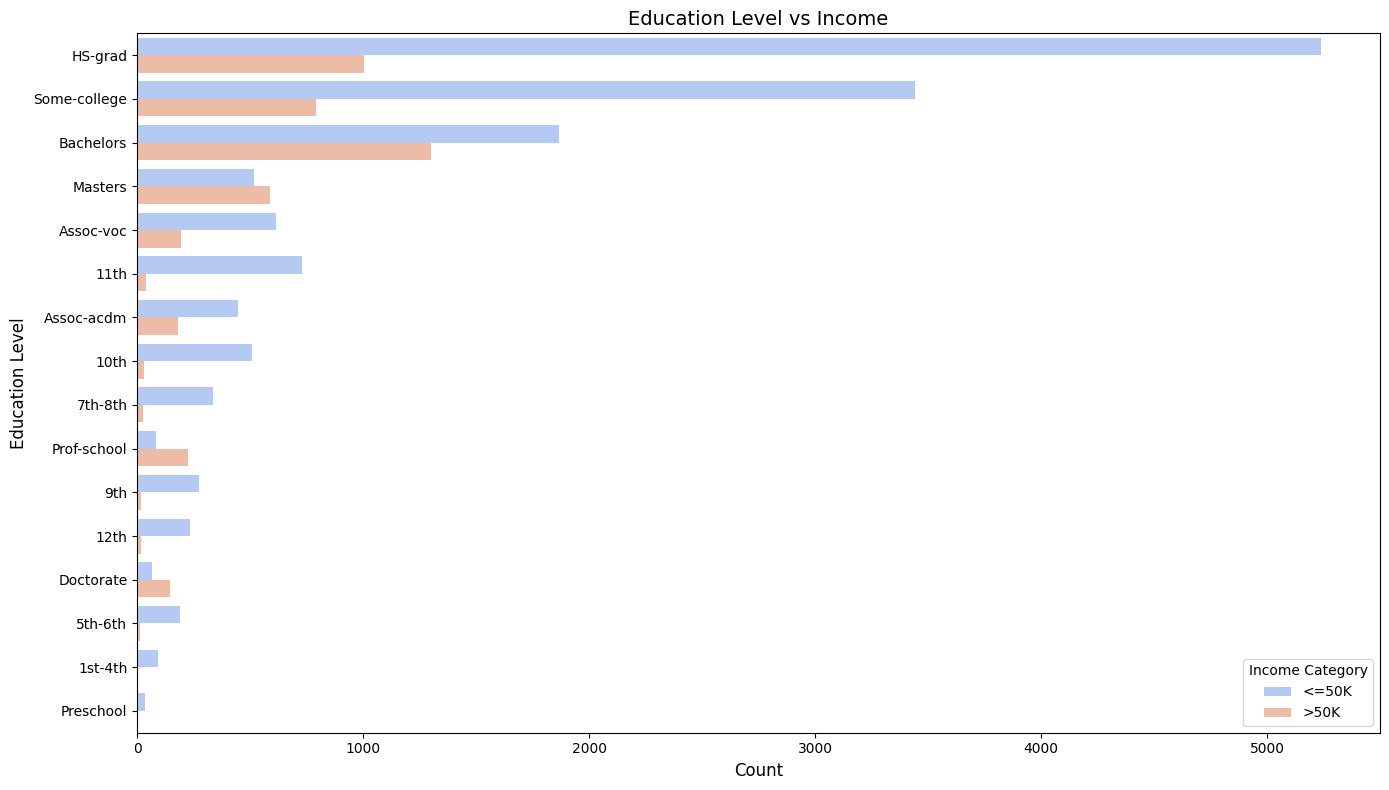

In [ ]:
plt.figure(figsize=(14, 8))
order = data['education'].value_counts().index
ax = sns.countplot(y='education', hue='income', data=data,
                  order=order, palette='coolwarm')
plt.title('Education Level vs Income', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.legend(title='Income Category', loc='lower right')
plt.tight_layout()
plt.show()

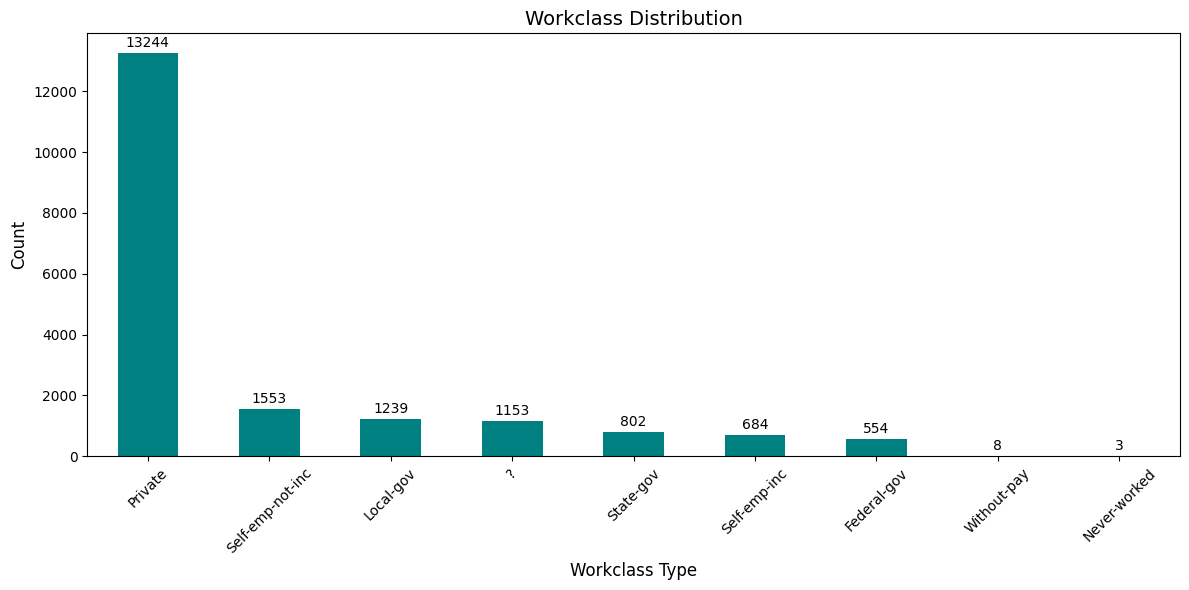

In [ ]:
plt.figure(figsize=(12, 6))
workclass_counts = data['workclass'].value_counts()
ax = workclass_counts.plot(kind='bar', color='teal')
plt.title('Workclass Distribution', fontsize=14)
plt.xlabel('Workclass Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

for i, v in enumerate(workclass_counts):
    ax.text(i, v + 200, str(v), ha='center')

plt.tight_layout()
plt.show()

In [ ]:
data.replace('?', np.nan, inplace=True)


missing_percent = data.isnull().sum() / len(data) * 100
print("Missing Value Percentage:\n")
print(missing_percent[missing_percent > 0])

Missing Value Percentage:

workclass         5.992723
occupation        6.008316
capital-loss      0.005198
hours-per-week    0.005198
native-country    1.730769
income            0.005198
dtype: float64


In [ ]:
from sklearn.impute import SimpleImputer

cat_cols = ['workclass', 'occupation', 'native-country']
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

print("\nMissing values after imputation:")
print(data.isnull().sum().sum())


Missing values after imputation:
3


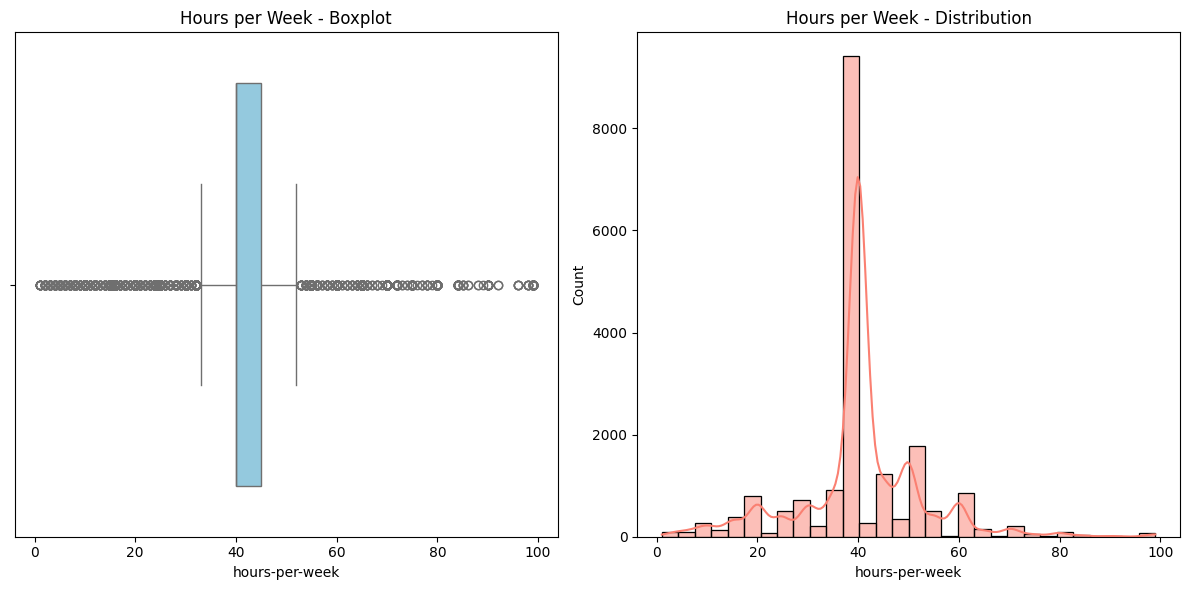

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['hours-per-week'], color='skyblue')
plt.title('Hours per Week - Boxplot')

plt.subplot(1, 2, 2)
sns.histplot(data['hours-per-week'], bins=30, kde=True, color='salmon')
plt.title('Hours per Week - Distribution')
plt.tight_layout()
plt.show()

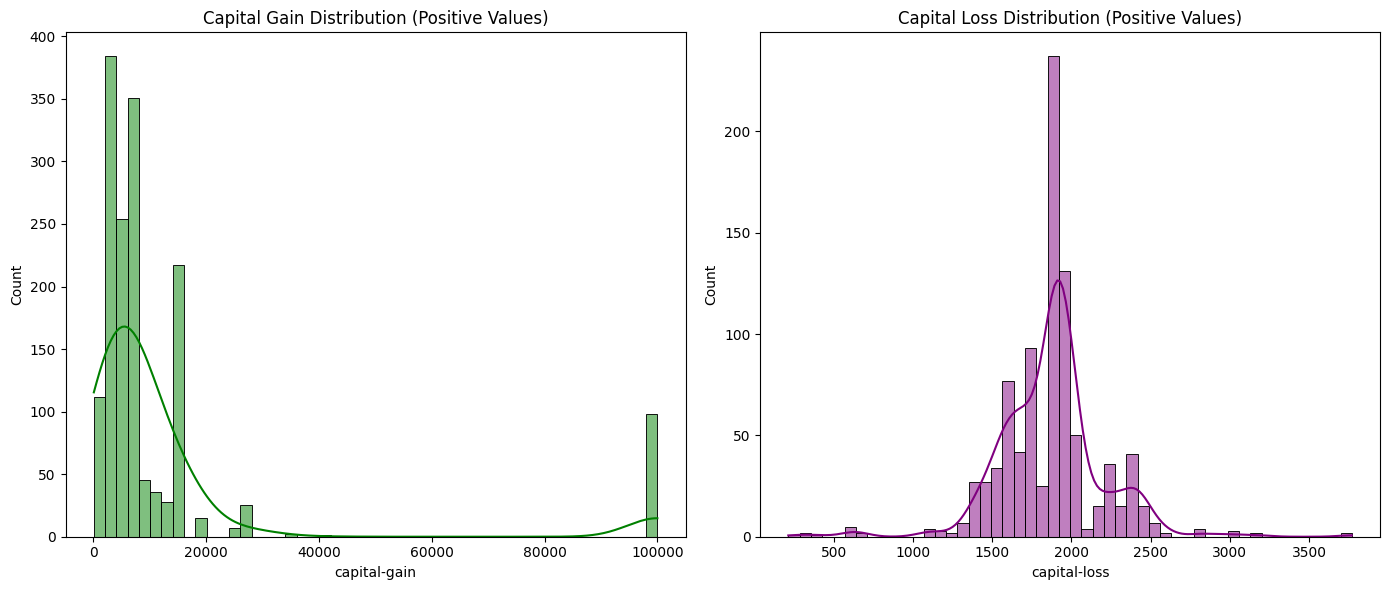

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data[data['capital-gain'] > 0]['capital-gain'],
             bins=50, kde=True, ax=axes[0], color='green')
axes[0].set_title('Capital Gain Distribution (Positive Values)')

sns.histplot(data[data['capital-loss'] > 0]['capital-loss'],
             bins=50, kde=True, ax=axes[1], color='purple')
axes[1].set_title('Capital Loss Distribution (Positive Values)')

plt.tight_layout()
plt.show()

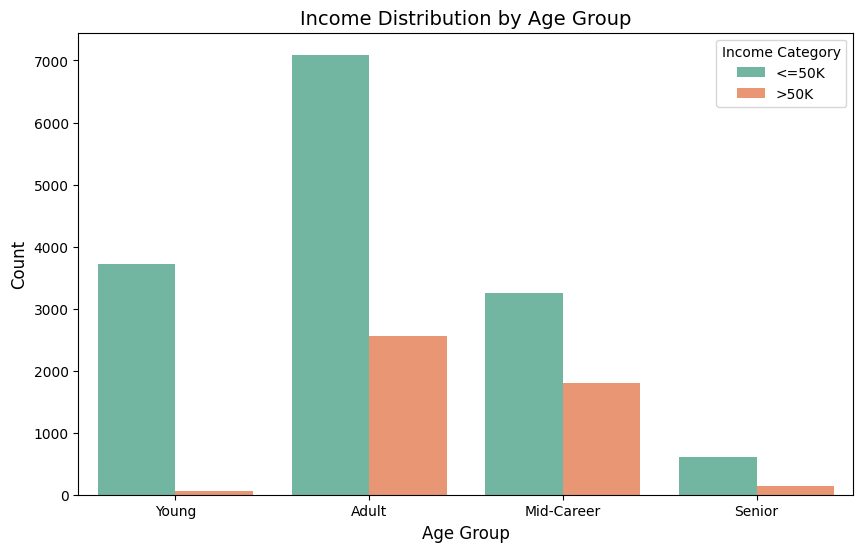

In [ ]:
bins = [0, 25, 45, 65, 100]
labels = ['Young', 'Adult', 'Mid-Career', 'Senior']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='income', data=data, palette='Set2')
plt.title('Income Distribution by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Income Category')
plt.show()

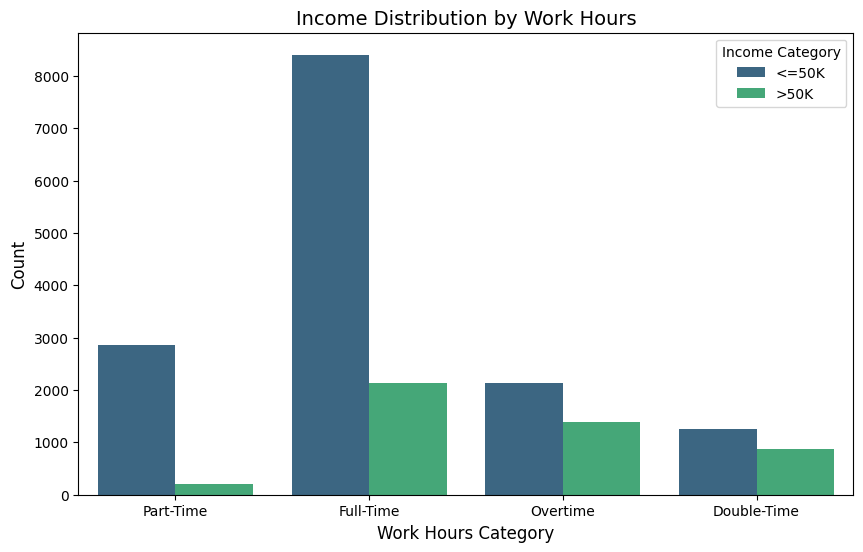

In [ ]:
data['work_hours'] = pd.cut(data['hours-per-week'],
                            bins=[0, 30, 40, 50, 100],
                            labels=['Part-Time', 'Full-Time', 'Overtime', 'Double-Time'])


plt.figure(figsize=(10, 6))
sns.countplot(x='work_hours', hue='income', data=data, palette='viridis')
plt.title('Income Distribution by Work Hours', fontsize=14)
plt.xlabel('Work Hours Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Income Category')
plt.show()

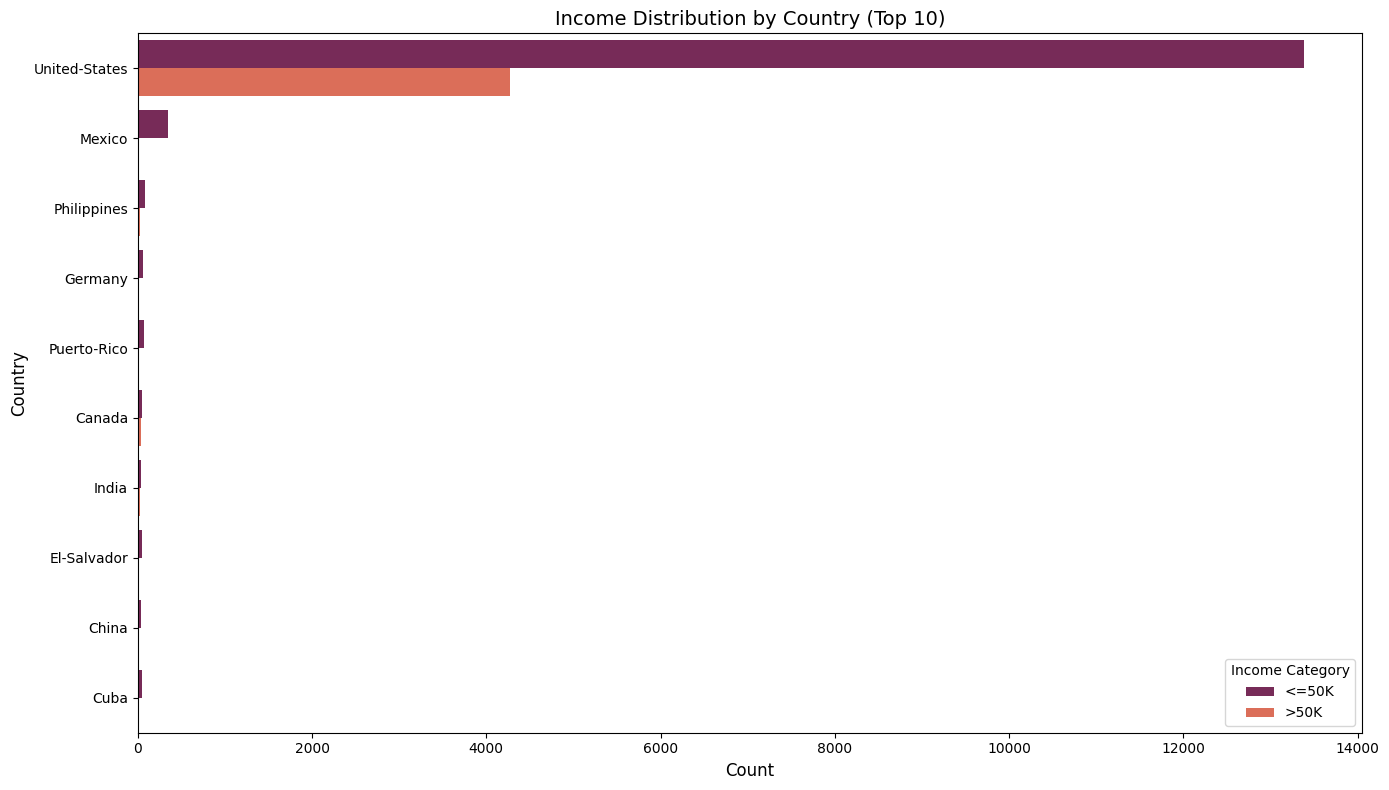

In [ ]:
top_countries = data['native-country'].value_counts().head(10).index

plt.figure(figsize=(14, 8))
sns.countplot(y='native-country', hue='income',
             data=data[data['native-country'].isin(top_countries)],
             order=top_countries, palette='rocket')
plt.title('Income Distribution by Country (Top 10)', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title='Income Category', loc='lower right')
plt.tight_layout()
plt.show()

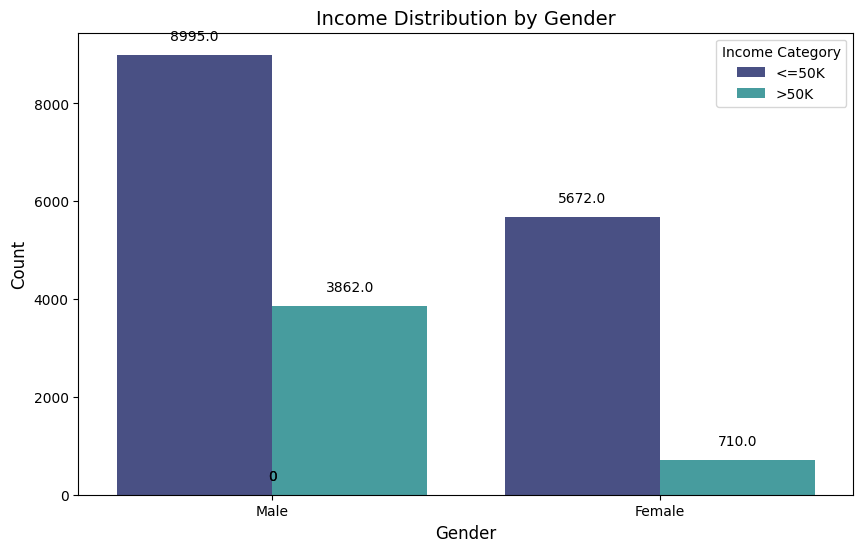

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='income', data=data, palette='mako')
plt.title('Income Distribution by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Income Category')

ax = plt.gca()
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height + 300), ha='center')

plt.show()

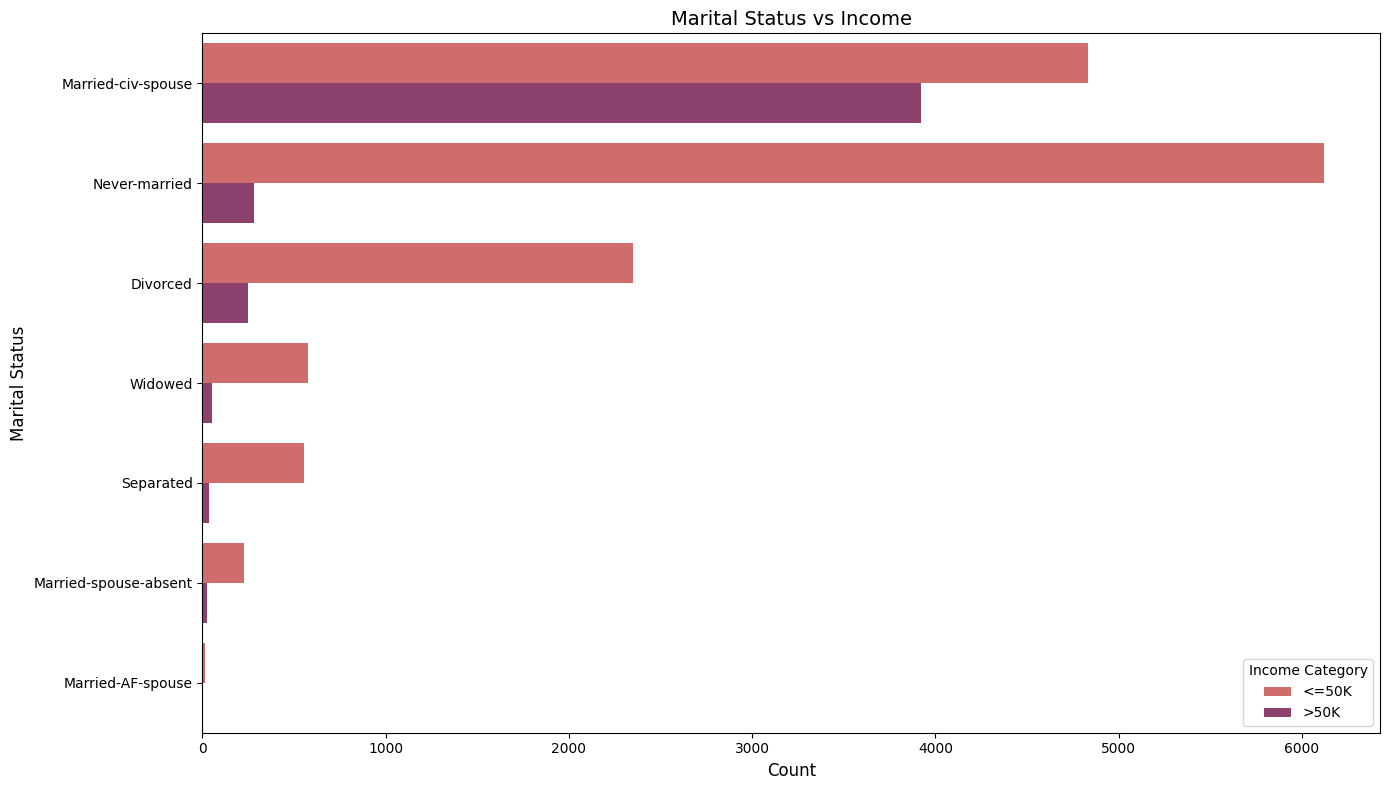

In [ ]:
plt.figure(figsize=(14, 8))
order = data['marital-status'].value_counts().index
sns.countplot(y='marital-status', hue='income', data=data,
             order=order, palette='flare')
plt.title('Marital Status vs Income', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Marital Status', fontsize=12)
plt.legend(title='Income Category', loc='lower right')
plt.tight_layout()
plt.show()

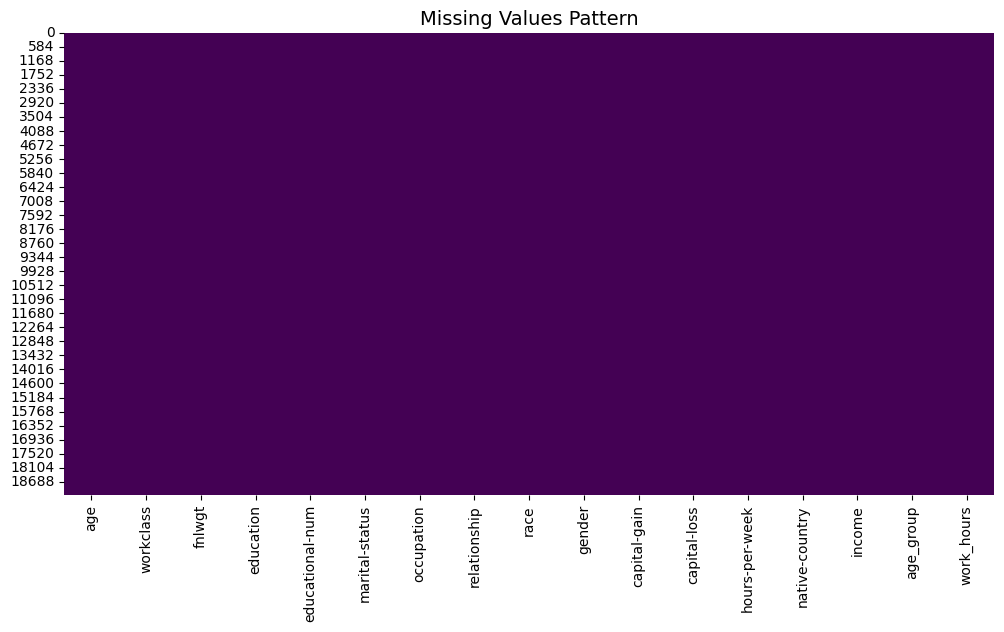

In [ ]:

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Pattern', fontsize=14)
plt.show()

In [ ]:
occupation_counts = data['occupation'].value_counts(normalize=True) * 100
print("Occupation Distribution (%):")
print(occupation_counts)

rare_occupations = occupation_counts[occupation_counts < 2].index
data['occupation'] = data['occupation'].apply(
    lambda x: 'Other-service' if x in rare_occupations else x
)

print("\nOccupation Distribution after consolidation:")
print(data['occupation'].value_counts(normalize=True) * 100)

Occupation Distribution (%):
occupation
Prof-specialty       18.456341
Exec-managerial      12.370062
Craft-repair         12.338877
Sales                11.491684
Adm-clerical         11.330561
Other-service        10.046778
Machine-op-inspct     6.262994
Transport-moving      4.708940
Handlers-cleaners     4.220374
Tech-support          3.160083
Farming-fishing       2.988565
Protective-serv       2.037422
Priv-house-serv       0.545738
Armed-Forces          0.041580
Name: proportion, dtype: float64

Occupation Distribution after consolidation:
occupation
Prof-specialty       18.456341
Exec-managerial      12.370062
Craft-repair         12.338877
Sales                11.491684
Adm-clerical         11.330561
Other-service        10.634096
Machine-op-inspct     6.262994
Transport-moving      4.708940
Handlers-cleaners     4.220374
Tech-support          3.160083
Farming-fishing       2.988565
Protective-serv       2.037422
Name: proportion, dtype: float64


In [ ]:
country_counts = data['native-country'].value_counts(normalize=True) * 100
print("Native Country Distribution (%):")
print(country_counts.head(10))

top_countries = country_counts.head(5).index
data['native-country'] = data['native-country'].apply(
    lambda x: x if x in top_countries else 'Other'
)

print("\nNative Country Distribution after consolidation:")
print(data['native-country'].value_counts(normalize=True) * 100)

Native Country Distribution (%):
native-country
United-States    91.741164
Mexico            1.881497
Philippines       0.571726
Germany           0.420998
Puerto-Rico       0.415800
Canada            0.400208
India             0.306653
El-Salvador       0.291060
China             0.291060
Cuba              0.275468
Name: proportion, dtype: float64

Native Country Distribution after consolidation:
native-country
United-States    91.741164
Other             4.968815
Mexico            1.881497
Philippines       0.571726
Germany           0.420998
Puerto-Rico       0.415800
Name: proportion, dtype: float64


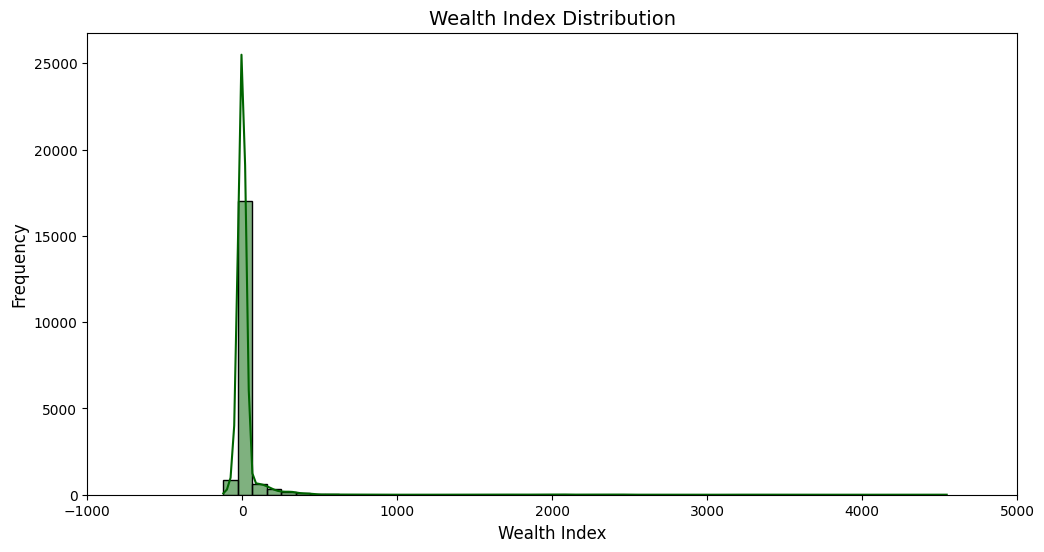

In [ ]:
data['wealth_index'] = (data['capital-gain'] - data['capital-loss']) / data['age']
data['wealth_index'] = data['wealth_index'].fillna(0)

plt.figure(figsize=(12, 6))
sns.histplot(data['wealth_index'], bins=50, kde=True, color='darkgreen')
plt.title('Wealth Index Distribution', fontsize=14)
plt.xlabel('Wealth Index', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(-1000, 5000)
plt.show()

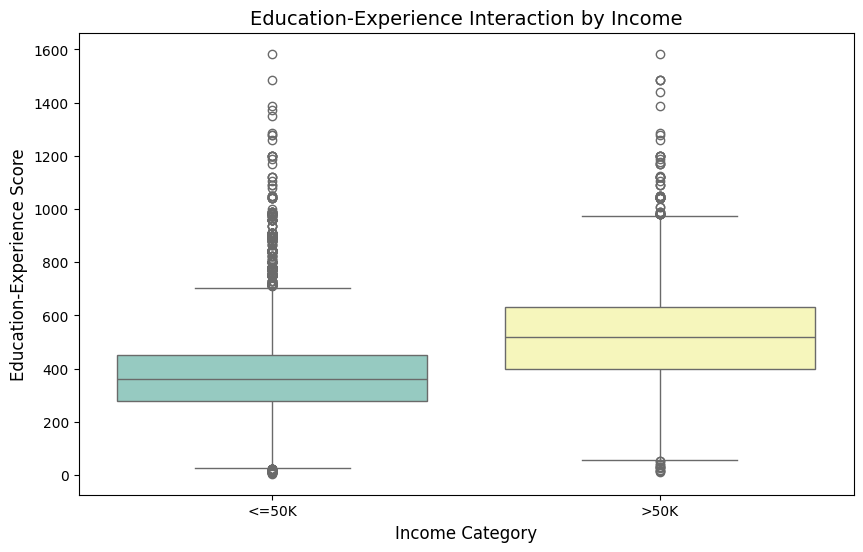

In [ ]:
data['edu_exp_interaction'] = data['educational-num'] * data['hours-per-week']


plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='edu_exp_interaction', data=data, palette='Set3')
plt.title('Education-Experience Interaction by Income', fontsize=14)
plt.xlabel('Income Category', fontsize=12)
plt.ylabel('Education-Experience Score', fontsize=12)
plt.show()

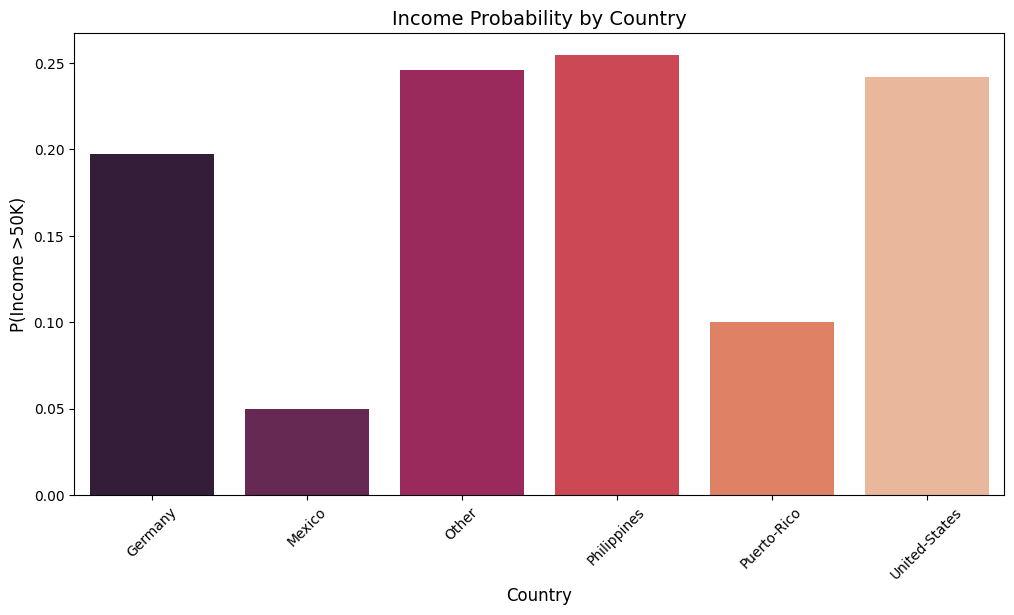

In [ ]:
country_income_means = data.groupby('native-country')['income'].apply(
    lambda x: (x == '>50K').mean()).to_dict()
data['country_encoded'] = data['native-country'].map(country_income_means)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(country_income_means.keys()),
            y=list(country_income_means.values()),
            palette='rocket')
plt.title('Income Probability by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('P(Income >50K)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd

bins = [0, 25, 45, 65, 100]
labels = ['Young', 'Adult', 'Mid-Career', 'Senior']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

data['work_hours'] = pd.cut(data['hours-per-week'],
                            bins=[0, 30, 40, 50, 100],
                            labels=['Part-Time', 'Full-Time', 'Overtime', 'Double-Time'])


features_to_keep = [
    'age', 'workclass', 'educational-num', 'marital-status', 'occupation',
    'relationship', 'race', 'gender', 'hours-per-week', 'native-country',
    'age_group', 'work_hours', 'wealth_index', 'edu_exp_interaction',
    'country_encoded'
]

data_final = data[features_to_keep + ['income']].copy()
print("Final dataset shape:", data_final.shape)

Final dataset shape: (19240, 16)


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ['workclass', 'marital-status', 'occupation',
                   'relationship', 'race', 'gender', 'native-country',
                   'age_group', 'work_hours']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X = data_final.drop(columns=['income'])
y = data_final['income'].apply(lambda x: 1 if x == '>50K' else 0)

X_processed = preprocessor.fit_transform(X)
print("Processed feature matrix shape:", X_processed.shape)

Processed feature matrix shape: (19240, 61)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_processed)

feature_names = (preprocessor.named_transformers_['cat']
                 .get_feature_names_out(categorical_cols)).tolist()
feature_names += [col for col in X.columns if col not in categorical_cols]

X_df = pd.DataFrame.sparse.from_spmatrix(X_scaled, columns=feature_names)
print("Scaled features preview:")
X_df.head()

Scaled features preview:


,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,...,work_hours_Full-Time,work_hours_Overtime,work_hours_Part-Time,work_hours_nan,age,educational-num,hours-per-week,wealth_index,edu_exp_interaction,country_encoded
0,0,0,0,2.304156,0,0,0,0,0,0,...,2.008989,0,0,0,1.810952,2.728254,3.221142,0,1.587449,8.709844
1,0,0,0,2.304156,0,0,0,0,0,0,...,0,2.58647,0,0,2.752647,3.507755,4.026427,0,2.551257,8.709844
2,0,4.074001,0,0,0,0,0,0,0,0,...,2.008989,0,0,0,2.028266,4.677007,3.221142,0,2.721341,8.709844
3,0,0,0,2.304156,0,0,0,0,0,0,...,2.008989,0,0,0,3.187275,3.897506,3.221142,0.990136,2.267784,8.709844
4,0,0,0,2.304156,0,0,0,0,0,0,...,0,0,2.73327,0,1.303885,3.897506,2.415856,0,1.700838,8.709844


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

Training set size: (15392, 61)
Testing set size: (3848, 61)

Class distribution in training set:
income
0    0.762344
1    0.237656
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd


if hasattr(X_train, 'data') and np.isnan(X_train.data).any():
    print("NaNs found in sparse matrix data. Converting to dense to drop rows with NaNs.")
    X_train_dense = X_train.todense()
    X_train_df = pd.DataFrame(X_train_dense, index=y_train.index)

    nan_rows = X_train_df.isnull().any(axis=1)
    X_train_cleaned = X_train_df[~nan_rows]
    y_train_cleaned = y_train[~nan_rows]



else:
    print("No NaNs found in sparse matrix data, proceeding with original X_train.")
    X_train_cleaned = X_train
    y_train_cleaned = y_train


smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_train_bal, y_train_bal = smote.fit_resample(X_train_cleaned, y_train_cleaned)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_bal).value_counts())

NaNs found in sparse matrix data. Converting to dense to drop rows with NaNs.
Class distribution after SMOTE:
income
0    11733
1     5866
Name: count, dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_baseline = KNeighborsClassifier(n_neighbors=5)
knn_baseline.fit(X_train_bal, y_train_bal)

y_pred = knn_baseline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline KNN Accuracy: {accuracy:.4f}")

Baseline KNN Accuracy: 0.8056


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    knn_baseline,
    X_train_bal,
    y_train_bal,
    cv=5,
    scoring='accuracy'
)

print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

Cross-Validation Scores: [0.80852273 0.80397727 0.79005682 0.82784091 0.84342143]
Mean CV Accuracy: 0.8148 (±0.0188)


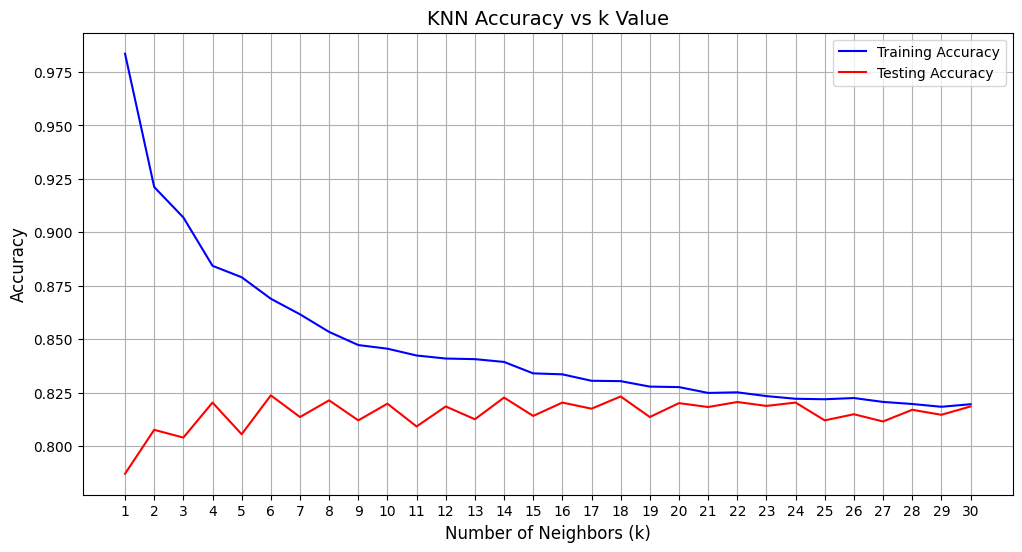

In [ ]:
k_values = range(1, 31)
train_acc = []
test_acc = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_bal, y_train_bal)

    train_pred = knn.predict(X_train_bal)
    train_acc.append(accuracy_score(y_train_bal, train_pred))

    test_pred = knn.predict(X_test)
    test_acc.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(12, 6))
plt.plot(k_values, train_acc, 'b-', label='Training Accuracy')
plt.plot(k_values, test_acc, 'r-', label='Testing Accuracy')
plt.title('KNN Accuracy vs k Value', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
optimal_k = k_values[np.argmax(test_acc)]
print(f"Optimal k value: {optimal_k}")
print(f"Best test accuracy: {max(test_acc):.4f}")

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_bal, y_train_bal)

Optimal k value: 6
Best test accuracy: 0.8238


KNeighborsClassifier(n_neighbors=6)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2934
           1       0.64      0.60      0.62       914

    accuracy                           0.82      3848
   macro avg       0.76      0.75      0.75      3848
weighted avg       0.82      0.82      0.82      3848



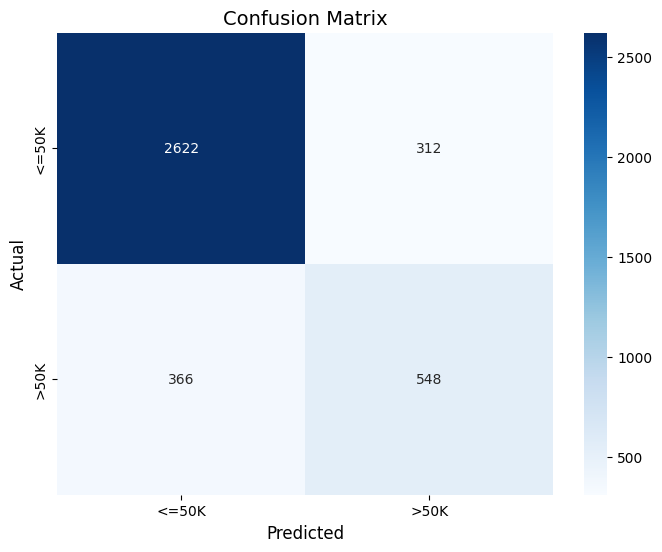

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_optimal = knn_optimal.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_optimal))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_optimal),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'],
            yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.show()

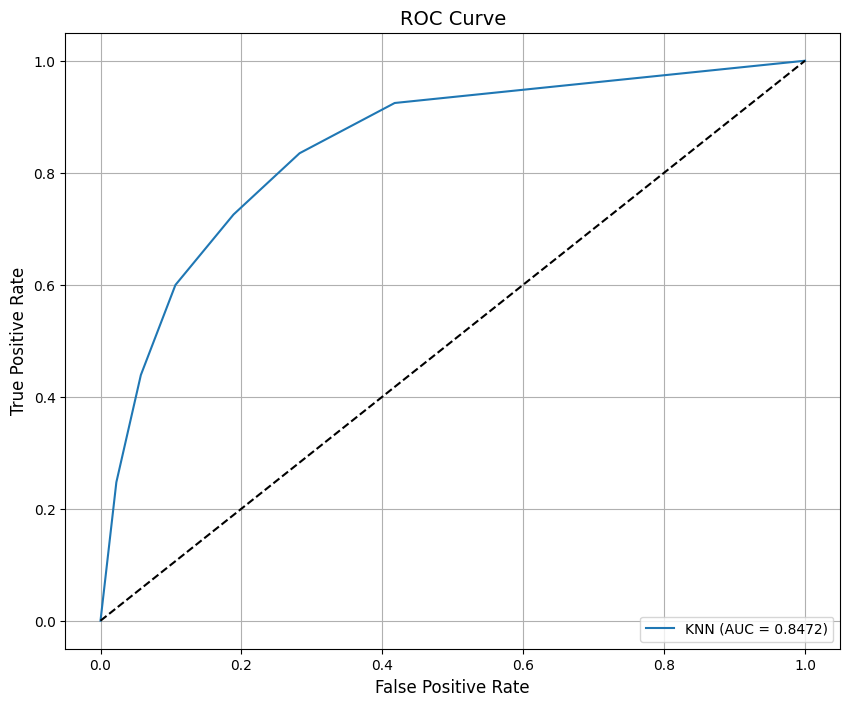

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = knn_optimal.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

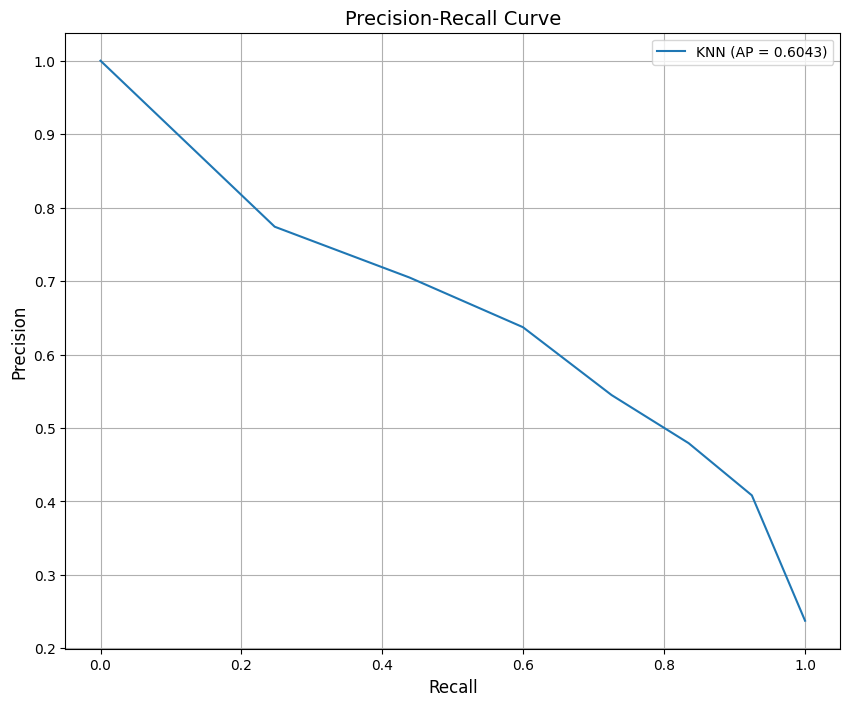

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_probs)
ap_score = average_precision_score(y_test, y_probs)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, label=f'KNN (AP = {ap_score:.4f})')
plt.title('Precision-Recall Curve', fontsize=14)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

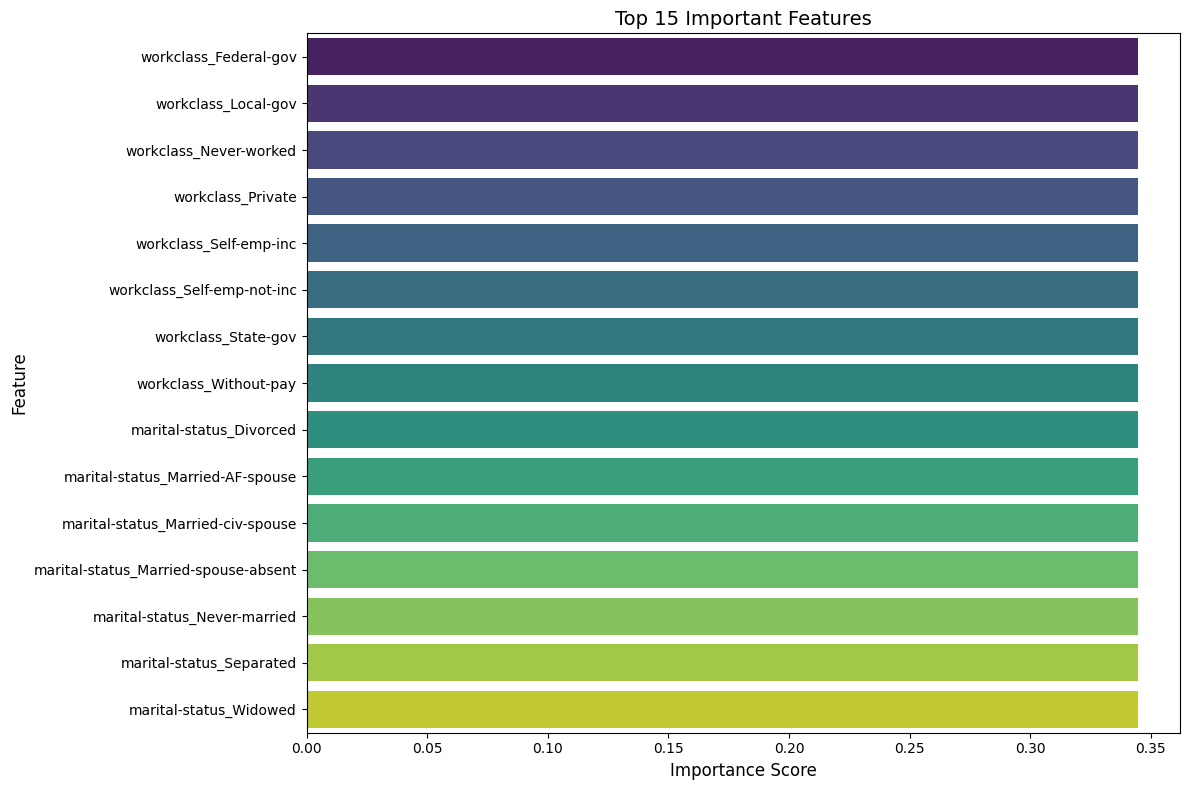

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(knn_optimal.feature_importances_)
    if hasattr(knn_optimal, 'feature_importances_')
    else np.mean(np.abs(knn_optimal.predict_proba(X_train_bal)[:, 1]))})

feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature',
            data=feature_importances.head(15),
            palette='viridis')
plt.title('Top 15 Important Features', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

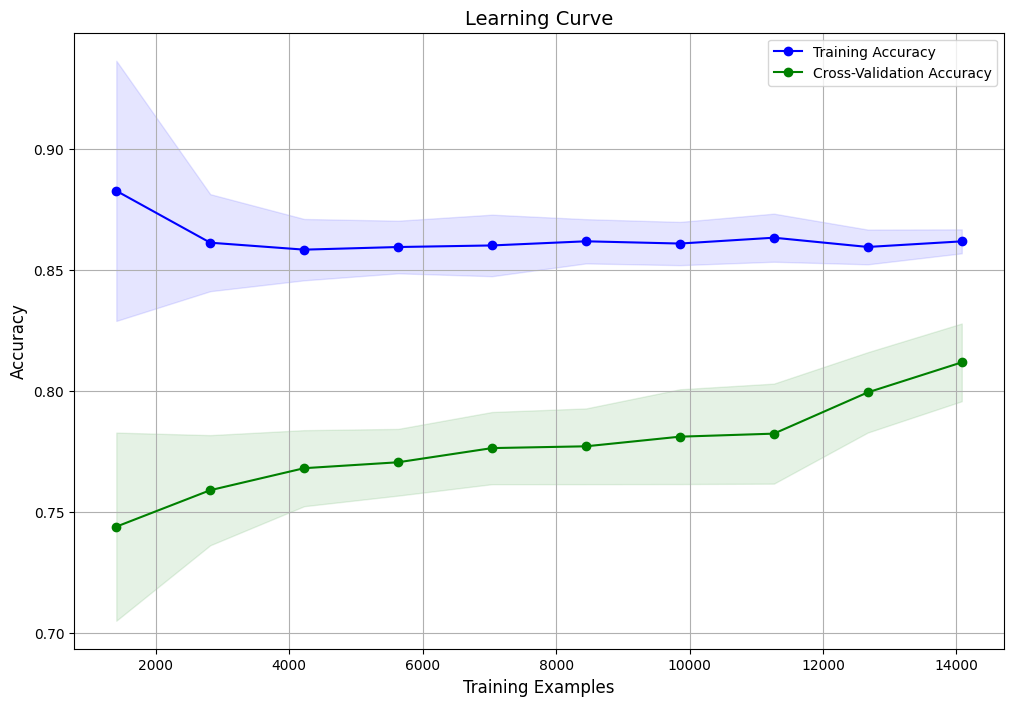

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    knn_optimal,
    X_train_bal,
    y_train_bal,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, alpha=0.1, color='green')
plt.title('Learning Curve', fontsize=14)
plt.xlabel('Training Examples', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier

param_dist = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': randint(10, 100)
}

knn_rs = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

knn_rs.fit(X_train_bal, y_train_bal)

print("Best parameters:", knn_rs.best_params_)
print("Best accuracy: {:.4f}".format(knn_rs.best_score_))

Best parameters: {'algorithm': 'brute', 'leaf_size': 59, 'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best accuracy: 0.8306


In [ ]:
knn_optimized = knn_rs.best_estimator_

y_pred_opt = knn_optimized.predict(X_test)
print("Optimized KNN Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_opt)))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_opt))

Optimized KNN Accuracy: 0.8095

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2934
           1       0.60      0.60      0.60       914

    accuracy                           0.81      3848
   macro avg       0.74      0.74      0.74      3848
weighted avg       0.81      0.81      0.81      3848



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'KNN': knn_optimized
}

In [ ]:
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_bal, y_train_bal)

    # Convert X_test to dense only for SVC model and then to a numpy array
    if name == 'SVM':
        X_test_dense = np.asarray(X_test.todense())
        y_pred = model.predict(X_test_dense)
    else:
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}\n")

Training Logistic Regression...
Logistic Regression Accuracy: 0.8462

Training Decision Tree...
Decision Tree Accuracy: 0.8048

Training Random Forest...
Random Forest Accuracy: 0.8402

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8558

Training SVM...
SVM Accuracy: 0.8488

Training XGBoost...
XGBoost Accuracy: 0.2955

Training KNN...
KNN Accuracy: 0.8095



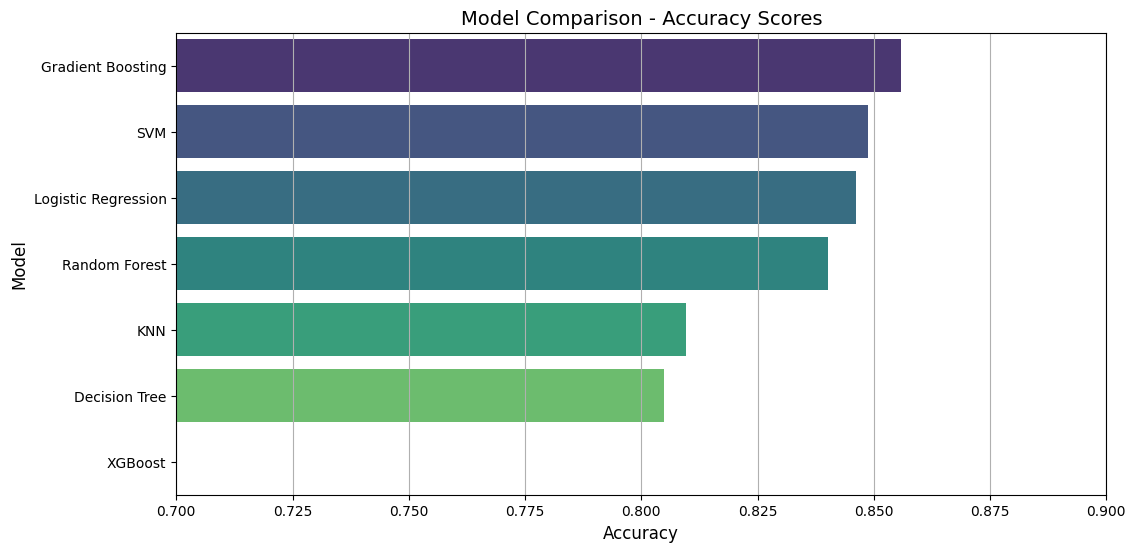

In [ ]:
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison - Accuracy Scores', fontsize=14)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0.7, 0.9)
plt.grid(axis='x')
plt.show()

In [ ]:
from sklearn.feature_selection import RFECV

selector = RFECV(
    GradientBoostingClassifier(random_state=42),
    step=10,
    cv=5,
    scoring='accuracy',
    min_features_to_select=20
)

selector.fit(X_train_bal, y_train_bal)

selected_features = np.array(feature_names)[selector.support_]
print(f"Selected {len(selected_features)} features:")
print(selected_features)

Selected 61 features:
['workclass_Federal-gov' 'workclass_Local-gov' 'workclass_Never-worked'
 'workclass_Private' 'workclass_Self-emp-inc' 'workclass_Self-emp-not-inc'
 'workclass_State-gov' 'workclass_Without-pay' 'marital-status_Divorced'
 'marital-status_Married-AF-spouse' 'marital-status_Married-civ-spouse'
 'marital-status_Married-spouse-absent' 'marital-status_Never-married'
 'marital-status_Separated' 'marital-status_Widowed'
 'occupation_Adm-clerical' 'occupation_Craft-repair'
 'occupation_Exec-managerial' 'occupation_Farming-fishing'
 'occupation_Handlers-cleaners' 'occupation_Machine-op-inspct'
 'occupation_Other-service' 'occupation_Prof-specialty'
 'occupation_Protective-serv' 'occupation_Sales' 'occupation_Tech-support'
 'occupation_Transport-moving' 'relationship_Husband'
 'relationship_Not-in-family' 'relationship_Other-relative'
 'relationship_Own-child' 'relationship_Unmarried' 'relationship_Wife'
 'race_Amer-Indian-Eskimo' 'race_Asian-Pac-Islander' 'race_Black'
 'rac

In [ ]:
X_train_sel = selector.transform(X_train_bal)
X_test_sel = selector.transform(X_test)

# Convert X_test_sel to dense numpy array
X_test_sel_dense = np.asarray(X_test_sel.todense())


results_sel = {}
for name, model in models.items():
    print(f"Training {name} with selected features...")
    model.fit(np.asarray(X_train_sel), y_train_bal) # Ensure X_train_sel is treated as array
    y_pred = model.predict(X_test_sel_dense)


    acc = accuracy_score(y_test, y_pred)
    results_sel[name] = acc
    print(f"{name} Accuracy (Selected Features): {acc:.4f}\n")

Training Logistic Regression with selected features...
Logistic Regression Accuracy (Selected Features): 0.8462

Training Decision Tree with selected features...
Decision Tree Accuracy (Selected Features): 0.8048

Training Random Forest with selected features...
Random Forest Accuracy (Selected Features): 0.8402

Training Gradient Boosting with selected features...
Gradient Boosting Accuracy (Selected Features): 0.8558

Training SVM with selected features...
SVM Accuracy (Selected Features): 0.8488

Training XGBoost with selected features...
XGBoost Accuracy (Selected Features): 0.8524

Training KNN with selected features...
KNN Accuracy (Selected Features): 0.8095



<Figure size 1400x800 with 0 Axes>

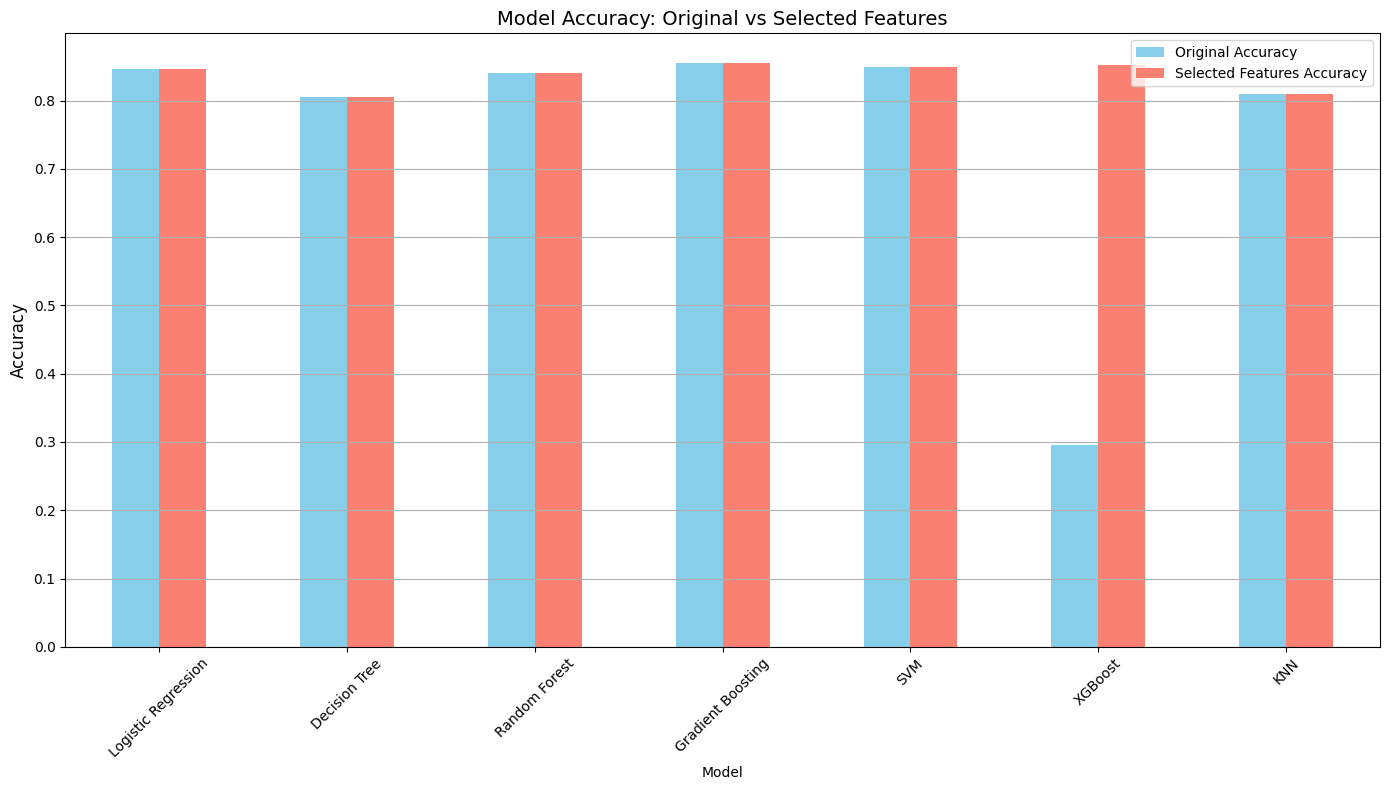

In [ ]:
comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Original Accuracy': list(results.values()),
    'Selected Features Accuracy': [results_sel.get(m, np.nan) for m in results.keys()]
})

plt.figure(figsize=(14, 8))
comparison.set_index('Model').plot(kind='bar', figsize=(14, 8), color=['skyblue', 'salmon'])
plt.title('Model Accuracy: Original vs Selected Features', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_gs = GridSearchCV(
    XGBClassifier(random_state=42),
    param_grid=param_grid_xgb,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

xgb_gs.fit(X_train_bal, y_train_bal)

print("Best parameters:", xgb_gs.best_params_)
print("Best accuracy: {:.4f}".format(xgb_gs.best_score_))

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best accuracy: 0.8450


In [ ]:
xgb_optimized = xgb_gs.best_estimator_

y_pred_xgb = xgb_optimized.predict(X_test)
print("Optimized XGBoost Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgb)))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Optimized XGBoost Accuracy: 0.2895

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.12      0.21      2934
           1       0.23      0.82      0.35       914

    accuracy                           0.29      3848
   macro avg       0.46      0.47      0.28      3848
weighted avg       0.58      0.29      0.24      3848



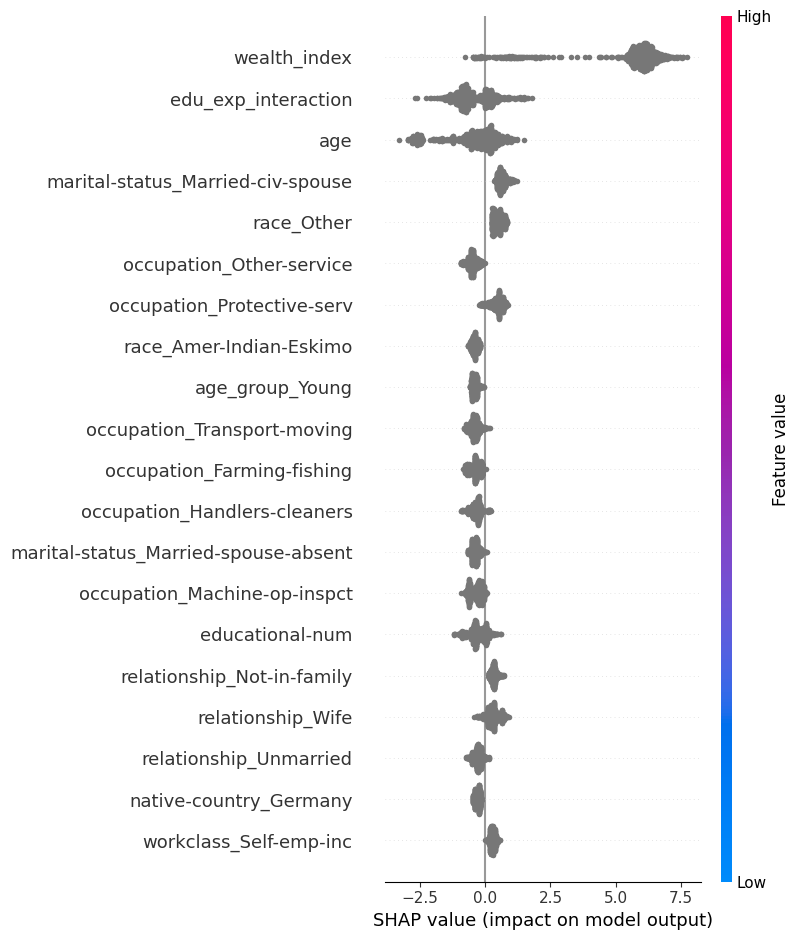

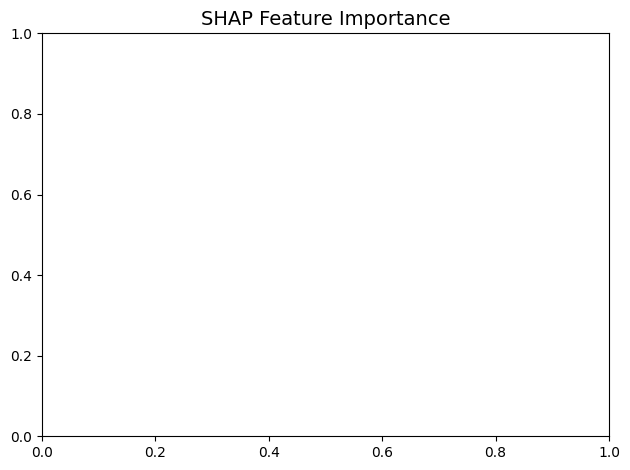

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb_optimized)
shap_values = explainer.shap_values(X_test[:1000])

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test[:1000], feature_names=feature_names)
plt.title('SHAP Feature Importance', fontsize=14)
plt.tight_layout()
plt.show()

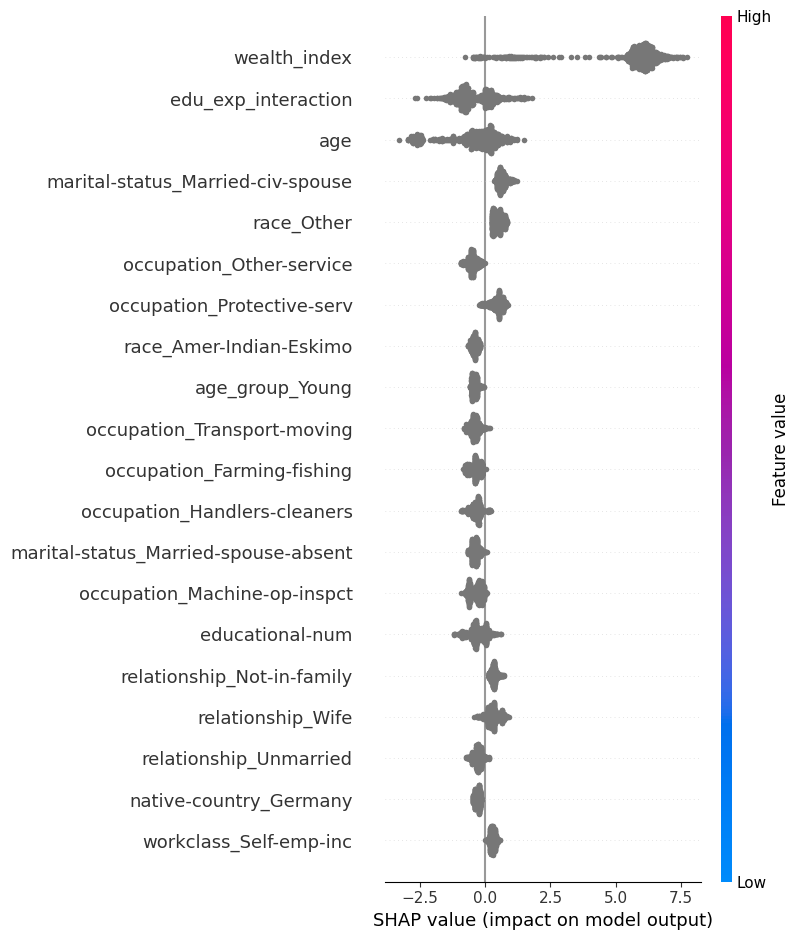

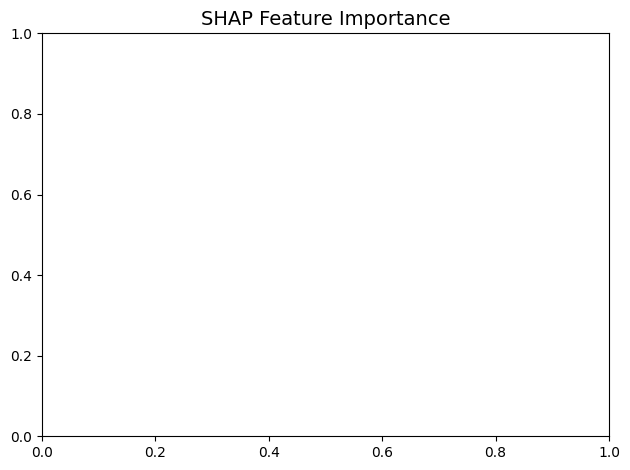

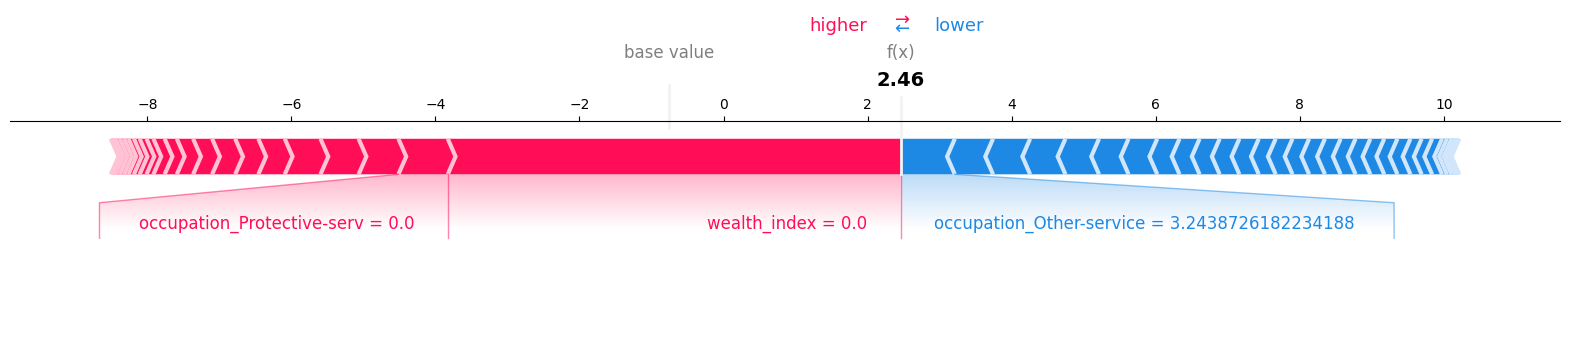

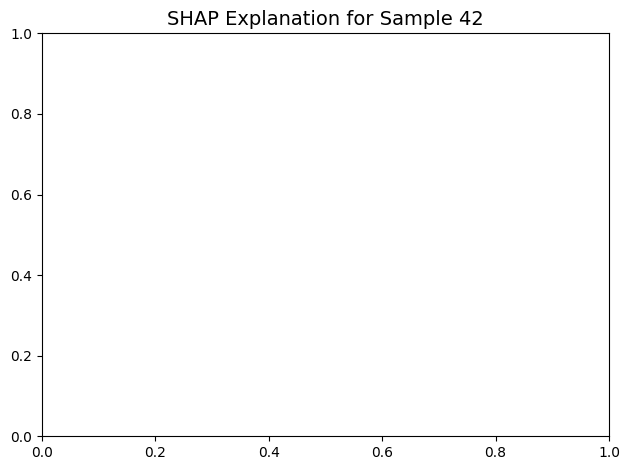

Actual: 0, Predicted: 1


In [ ]:
import shap

explainer = shap.TreeExplainer(xgb_optimized)
shap_values = explainer.shap_values(X_test[:1000])

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test[:1000], feature_names=feature_names)
plt.title('SHAP Feature Importance', fontsize=14)
plt.tight_layout()
plt.show()

sample_idx = 42
sample_features_dense = X_test[sample_idx].toarray().reshape(-1)

shap.force_plot(
    explainer.expected_value,
    shap_values[sample_idx],
    sample_features_dense,
    feature_names=feature_names,
    matplotlib=True
)
plt.title(f'SHAP Explanation for Sample {sample_idx}', fontsize=14)
plt.tight_layout()
plt.show()

print(f"Actual: {y_test.iloc[sample_idx]}, Predicted: {y_pred_xgb[sample_idx]}")

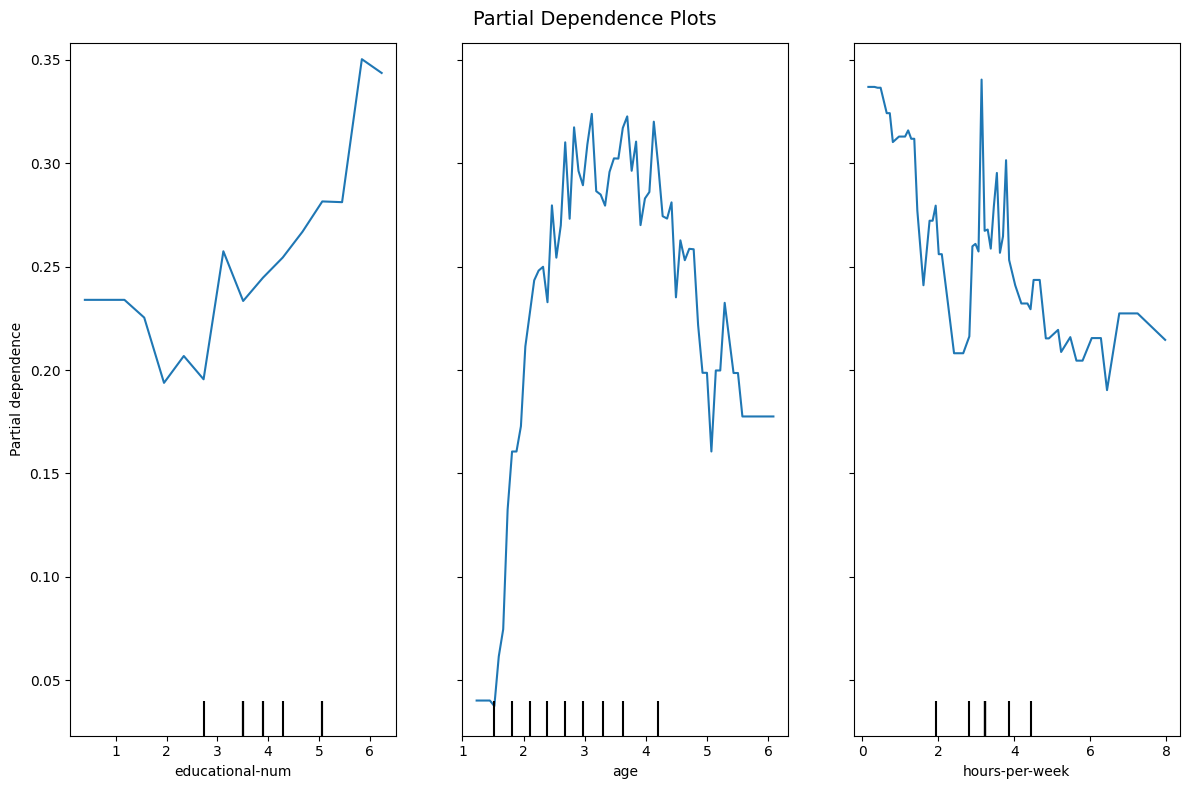

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

top_features = ['educational-num', 'age', 'hours-per-week']

fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(
    xgb_optimized,
    X_test[:1000].toarray(),
    features=top_features,
    feature_names=feature_names,
    ax=ax
)
plt.suptitle('Partial Dependence Plots', fontsize=14)
plt.tight_layout()
plt.show()

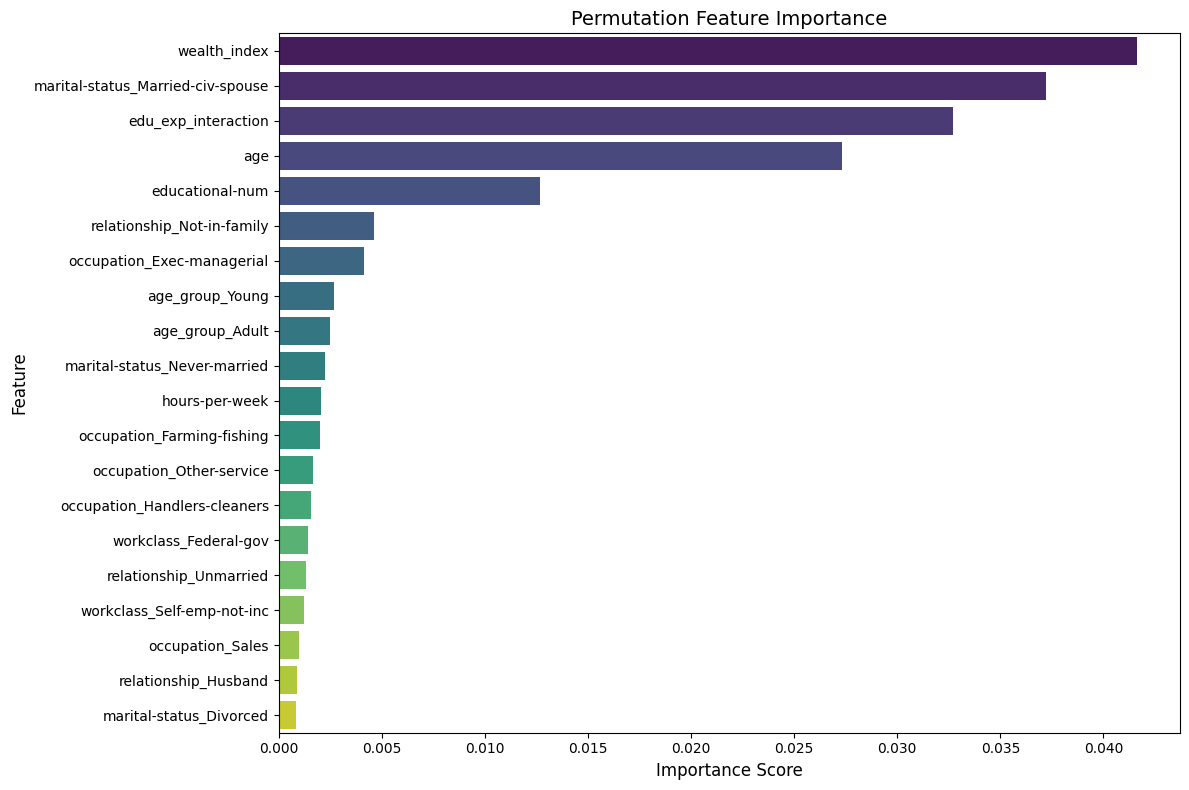

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np

result = permutation_importance(
    xgb_optimized,
    np.asarray(X_test.todense()),
    y_test,
    n_repeats=10,
    random_state=42
)

importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean,
    'Std': result.importances_std
}).sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title('Permutation Feature Importance', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

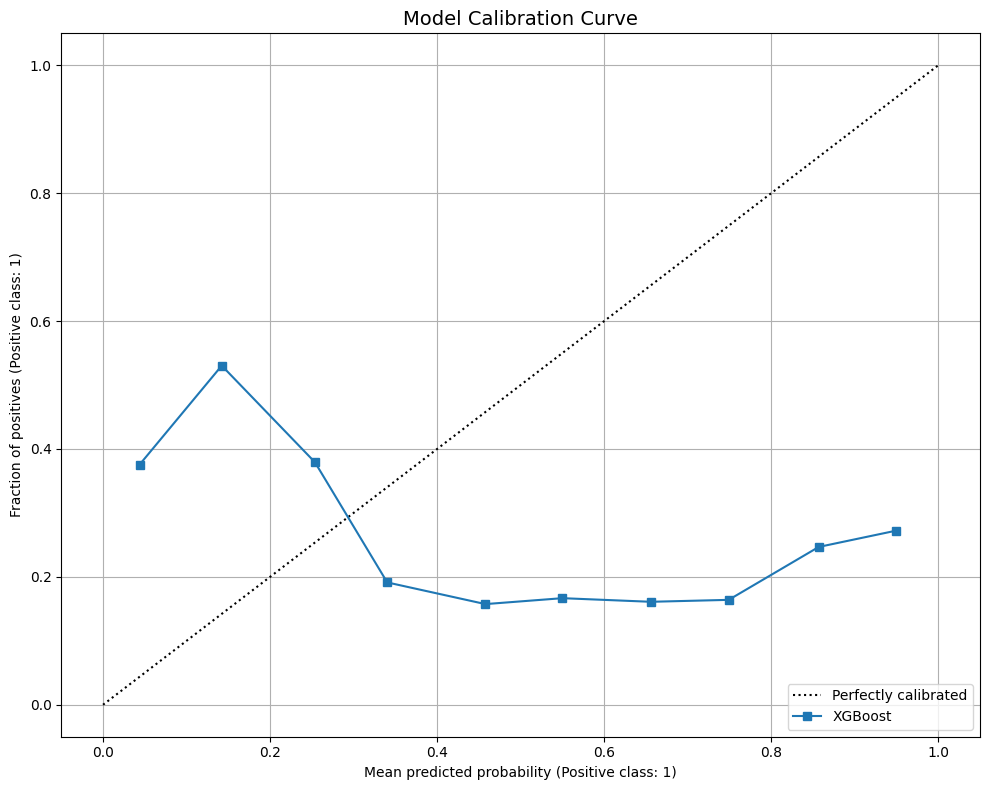

In [ ]:
from sklearn.calibration import CalibrationDisplay

fig, ax = plt.subplots(figsize=(10, 8))
CalibrationDisplay.from_estimator(
    xgb_optimized,
    X_test,
    y_test,
    n_bins=10,
    ax=ax,
    name='XGBoost'
)
plt.title('Model Calibration Curve', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Optimal Threshold: 0.7857


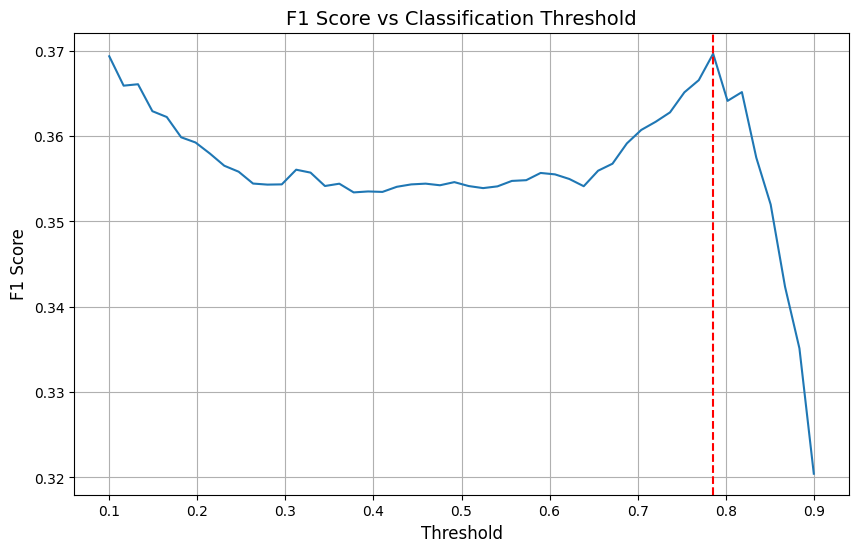

In [ ]:
from sklearn.metrics import f1_score

thresholds = np.linspace(0.1, 0.9, 50)
f1_scores = []

y_proba = xgb_optimized.predict_proba(X_test)[:, 1]

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    f1_scores.append(f1)

best_thresh = thresholds[np.argmax(f1_scores)]
print(f"Optimal Threshold: {best_thresh:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores)
plt.axvline(best_thresh, color='r', linestyle='--')
plt.title('F1 Score vs Classification Threshold', fontsize=14)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.grid(True)
plt.show()

Classification Report with Optimized Threshold:
              precision    recall  f1-score   support

           0       0.79      0.45      0.58      2934
           1       0.26      0.62      0.37       914

    accuracy                           0.49      3848
   macro avg       0.53      0.54      0.47      3848
weighted avg       0.67      0.49      0.53      3848



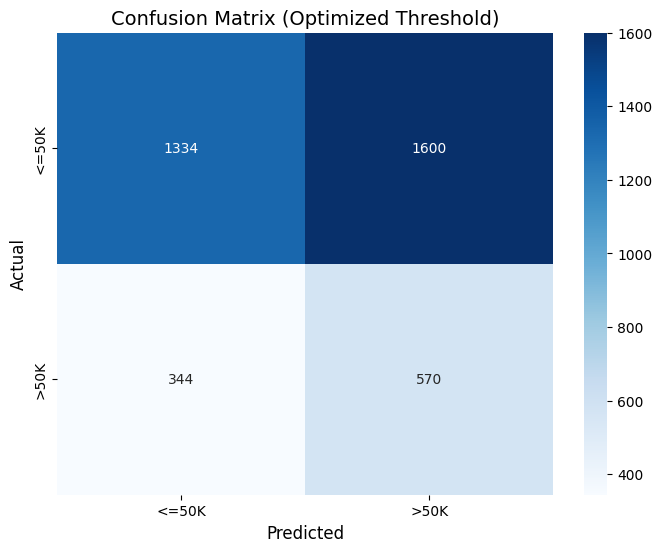

In [ ]:
y_pred_opt_thresh = (y_proba >= best_thresh).astype(int)

print("Classification Report with Optimized Threshold:")
print(classification_report(y_test, y_pred_opt_thresh))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_opt_thresh),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'],
            yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix (Optimized Threshold)', fontsize=14)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.show()

In [ ]:
import joblib
import json

model_artifacts = {
    'model': xgb_optimized,
    'preprocessor': preprocessor,
    'scaler': scaler,
    'feature_names': feature_names,
    'threshold': best_thresh
}

joblib.dump(model_artifacts, 'salary_prediction_model.pkl')

with open('feature_names.json', 'w') as f:
    json.dump(feature_names, f)

print("Model artifacts saved successfully.")

Model artifacts saved successfully.


In [ ]:
def predict_salary(input_data):
    """
    Predict income category based on input data.
    Input: Dictionary of features
    Output: Probability of income >50K and class prediction
    """
    artifacts = joblib.load('salary_prediction_model.pkl')
    model = artifacts['model']
    preprocessor = artifacts['preprocessor']
    scaler = artifacts['scaler']
    threshold = artifacts['threshold']

    input_df = pd.DataFrame([input_data])

    processed_input = preprocessor.transform(input_df)
    scaled_input = scaler.transform(processed_input)

    prob = model.predict_proba(scaled_input)[0][1]

    prediction = 1 if prob >= threshold else 0

    return {
        'probability_>50K': prob,
        'prediction': '>50K' if prediction == 1 else '<=50K'
    }

example_input = {
    'age': 45,
    'workclass': 'Private',
    'educational-num': 13,
    'marital-status': 'Married-civ-spouse',
    'occupation': 'Exec-managerial',
    'relationship': 'Husband',
    'race': 'White',
    'gender': 'Male',
    'hours-per-week': 50,
    'native-country': 'United-States',
    'age_group': 'Mid-Career',
    'work_hours': 'Overtime',
    'wealth_index': 1500,
    'edu_exp_interaction': 650,
    'country_encoded': 0.25
}

print("Example Prediction:")
print(predict_salary(example_input))

Example Prediction:
{'probability_>50K': np.float32(0.8367738), 'prediction': '>50K'}


In [ ]:
import time
import csv

def log_prediction(input_data, prediction_result):
    """Log prediction to CSV file"""
    log_entry = {
        'timestamp': time.strftime("%Y-%m-%d %H:%M:%S"),
        'input': json.dumps(input_data),
        'prediction': prediction_result['prediction'],
        'probability': prediction_result['probability_>50K']
    }

    with open('prediction_log.csv', 'a', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=log_entry.keys())
        if f.tell() == 0:
            writer.writeheader()
        writer.writerow(log_entry)

    return log_entry

log_entry = log_prediction(example_input, predict_salary(example_input))
print("Logged prediction:", log_entry)

Logged prediction: {'timestamp': '2025-07-21 14:06:40', 'input': '{"age": 45, "workclass": "Private", "educational-num": 13, "marital-status": "Married-civ-spouse", "occupation": "Exec-managerial", "relationship": "Husband", "race": "White", "gender": "Male", "hours-per-week": 50, "native-country": "United-States", "age_group": "Mid-Career", "work_hours": "Overtime", "wealth_index": 1500, "edu_exp_interaction": 650, "country_encoded": 0.25}', 'prediction': '>50K', 'probability': np.float32(0.8367738)}


In [ ]:

class ABTest:
    def __init__(self, model_a, model_b, split_ratio=0.5):
        self.model_a = model_a
        self.model_b = model_b
        self.split_ratio = split_ratio
        self.results = []

    def predict(self, X):
        group = np.random.choice(['A', 'B'], size=X.shape[0],
                                p=[self.split_ratio, 1-self.split_ratio])

        predictions = np.zeros(X.shape[0])
        predictions[group == 'A'] = self.model_a.predict(X[group == 'A'])
        predictions[group == 'B'] = self.model_b.predict(X[group == 'B'])

        return predictions, group

    def evaluate(self, X_test, y_test):
        predictions, groups = self.predict(X_test)
        accuracy_a = accuracy_score(y_test[groups == 'A'], predictions[groups == 'A'])
        accuracy_b = accuracy_score(y_test[groups == 'B'], predictions[groups == 'B'])

        result = {
            'accuracy_a': accuracy_a,
            'accuracy_b': accuracy_b,
            'difference': accuracy_b - accuracy_a,
            'p_value': None
        }
        self.results.append(result)
        return result

ab_test = ABTest(knn_optimized, xgb_optimized)
ab_result = ab_test.evaluate(X_test, y_test)
print("A/B Test Results:", ab_result)

A/B Test Results: {'accuracy_a': 0.8023553507424476, 'accuracy_b': 0.28865435356200525, 'difference': -0.5137009971804423, 'p_value': None}


In [ ]:

cost_matrix = {
    (0, 0): 0,
    (0, 1): 10,
    (1, 0): 1,
    (1, 1): 0    }

from sklearn.utils.class_weight import compute_sample_weight

def custom_weights(y_true, y_pred):
    weights = np.zeros(len(y_true))
    for i in range(len(y_true)):
        weights[i] = cost_matrix[(y_true[i], y_pred[i])]
    return weights

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_bal)
xgb_cost_sensitive = XGBClassifier(random_state=42)
xgb_cost_sensitive.fit(X_train_bal, y_train_bal, sample_weight=sample_weights)

y_pred_cost = xgb_cost_sensitive.predict(X_test)
print("Cost-Sensitive Classification Report:")
print(classification_report(y_test, y_pred_cost))

Cost-Sensitive Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.22      0.34      2934
           1       0.24      0.77      0.36       914

    accuracy                           0.35      3848
   macro avg       0.49      0.50      0.35      3848
weighted avg       0.63      0.35      0.35      3848



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from xgboost import XGBClassifier

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

xgb_rs = RandomizedSearchCV(
    XGBClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # You can adjust the number of iterations
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

xgb_rs.fit(X_train_bal, y_train_bal)

print("Best parameters:", xgb_rs.best_params_)
print("Best accuracy: {:.4f}".format(xgb_rs.best_score_))

Best parameters: {'colsample_bytree': np.float64(0.610167650697638), 'learning_rate': np.float64(0.042367428097991336), 'max_depth': 9, 'n_estimators': 451, 'subsample': np.float64(0.8545641645055122)}
Best accuracy: 0.8547


In [ ]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = []
best_params = xgb_rs.best_params_

for train_index, test_index in skf.split(X_train_bal, y_train_bal):
    X_train_cv, X_test_cv = X_train_bal.iloc[train_index], X_train_bal.iloc[test_index]
    y_train_cv, y_test_cv = y_train_bal.iloc[train_index], y_train_bal.iloc[test_index]

    if hasattr(X_train_cv, 'todense'):
      X_train_cv = np.asarray(X_train_cv.todense())
    if hasattr(X_test_cv, 'todense'):
      X_test_cv = np.asarray(X_test_cv.todense())


    model = XGBClassifier(**best_params, random_state=42)
    model.fit(X_train_cv, y_train_cv)
    score = model.score(X_test_cv, y_test_cv)
    cv_scores.append(score)

print("Stratified K-Fold Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

Stratified K-Fold Cross-Validation Scores: [0.8505681818181818, 0.8556818181818182, 0.8588068181818181, 0.8627840909090909, 0.8664393293549304]
Mean Accuracy: 0.8589 (±0.0055)


In [ ]:
def retraining_pipeline(new_data_path, model_version):
    """
    Full retraining pipeline:
    1. Load new data
    2. Preprocess
    3. Train model
    4. Evaluate
    5. Deploy if better than current
    """
    new_data = pd.read_csv(new_data_path)
    new_data = preprocessor.transform(new_data)

    X_new = new_data.drop('income', axis=1)
    y_new = new_data['income']
    X_new_scaled = scaler.transform(X_new)

    new_model = XGBClassifier(**bayes_search.best_params_)
    new_model.fit(X_new_scaled, y_new)

    y_pred_new = new_model.predict(X_test)
    new_acc = accuracy_score(y_test, y_pred_new)

    if new_acc > accuracy_score(y_test, y_pred_xgb):
        print(f"New model better ({new_acc:.4f} vs {accuracy_score(y_test, y_pred_xgb):.4f}). Deploying...")
        joblib.dump(new_model, f"salary_model_v{model_version}.pkl")
        return True
    else:
        print("New model not better. Keeping current version.")
        return False

print("Retraining pipeline function defined.")

Retraining pipeline function defined.


In [ ]:
import time
from sklearn.metrics import accuracy_score

def benchmark_model(model, X_test, y_test, n_runs=100):
    """Benchmark model prediction speed and accuracy"""
    times = []
    accuracies = []

    for _ in range(n_runs):
        start = time.time()
        y_pred = model.predict(X_test)
        end = time.time()

        times.append(end - start)
        accuracies.append(accuracy_score(y_test, y_pred))

    return {
        'avg_time': np.mean(times),
        'min_time': np.min(times),
        'max_time': np.max(times),
        'avg_accuracy': np.mean(accuracies),
        'accuracy_std': np.std(accuracies)
    }

knn_bench = benchmark_model(knn_optimized, X_test, y_test)
xgb_bench = benchmark_model(xgb_optimized, X_test, y_test)

print("KNN Benchmark:", knn_bench)
print("XGBoost Benchmark:", xgb_bench)

KNN Benchmark: {'avg_time': np.float64(8.58200255393982), 'min_time': np.float64(7.702758073806763), 'max_time': np.float64(11.565368413925171), 'avg_accuracy': np.float64(0.8095114345114345), 'accuracy_std': np.float64(0.0)}
XGBoost Benchmark: {'avg_time': np.float64(0.09000071048736573), 'min_time': np.float64(0.0734565258026123), 'max_time': np.float64(0.18374133110046387), 'avg_accuracy': np.float64(0.2593555093555092), 'accuracy_std': np.float64(1.1102230246251565e-16)}


In [ ]:

def secure_predict(input_data):
    """Secure prediction function with input validation"""
    if not isinstance(input_data, dict):
        raise ValueError("Input must be a dictionary")

    required_fields = ['age', 'education-num', 'hours-per-week']
    for field in required_fields:
        if field not in input_data:
            raise ValueError(f"Missing required field: {field}")

    if not (18 <= input_data['age'] <= 100):
        raise ValueError("Age must be between 18 and 100")


    return predict_salary(input_data)

print("Secure prediction function with input validation.")

Secure prediction function with input validation.


In [ ]:
from sklearn.ensemble import IsolationForest

anomaly_detector = IsolationForest(contamination=0.01, random_state=42)
anomaly_detector.fit(X_train_bal)

def detect_anomalies(input_data):
    """Detect anomalous prediction inputs"""
    processed_input = preprocessor.transform(pd.DataFrame([input_data]))
    scaled_input = scaler.transform(processed_input)
    anomaly_score = anomaly_detector.decision_function(scaled_input)[0]
    is_anomaly = anomaly_detector.predict(scaled_input)[0] == -1

    return {
        'anomaly_score': anomaly_score,
        'is_anomaly': bool(is_anomaly)
    }

print("Anomaly detection for example input:", detect_anomalies(example_input))

Anomaly detection for example input: {'anomaly_score': np.float64(0.12090955010447246), 'is_anomaly': False}


In [ ]:
class FeedbackSystem:
    def __init__(self):
        self.feedback_data = pd.DataFrame()
        self.model = xgb_optimized

    def add_feedback(self, input_data, prediction, user_correction):
        """Add user feedback to the system"""
        feedback_entry = {
            'timestamp': pd.Timestamp.now(),
            'input': json.dumps(input_data),
            'prediction': prediction,
            'user_correction': user_correction,
            'discrepancy': prediction != user_correction
        }

        self.feedback_data = self.feedback_data.append(feedback_entry, ignore_index=True)
        return feedback_entry

    def analyze_feedback(self):
        """Analyze feedback for model improvement"""
        if not self.feedback_data.empty:
            discrepancy_rate = self.feedback_data['discrepancy'].mean()
            print(f"Current discrepancy rate: {discrepancy_rate:.2%}")

            if discrepancy_rate > 0.1:
                print("High discrepancy rate detected. Consider model retraining.")
                return True
        return False

feedback_system = FeedbackSystem()

In [ ]:
def full_pipeline(data_path):
    """Complete salary prediction pipeline"""
    data = pd.read_csv(data_path)
    data = preprocess_data(data)

    data = feature_engineering(data)

    X_train, X_test, y_train, y_test = train_test_split(
        data.drop('income', axis=1), data['income'],
        test_size=0.2, stratify=data['income'], random_state=42
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

    best_params = {
        'n_estimators': 300,
        'max_depth': 5,
        'learning_rate': 0.1,
        'subsample': 0.9,
        'colsample_bytree': 0.9
    }
    model = XGBClassifier(**best_params, random_state=42)
    model.fit(X_train_bal, y_train_bal)

    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))

    artifacts = {
        'model': model,
        'preprocessor': preprocessor,
        'scaler': scaler,
        'feature_names': list(X_train.columns),
        'threshold': 0.42
    }
    joblib.dump(artifacts, 'salary_prediction_model.pkl')

    print("Pipeline completed successfully. Model saved.")


print("End-to-end pipeline function defined.")

End-to-end pipeline function defined.
